In [1]:
import matplotlib.pyplot as pt
import numpy as np
import numpy.linalg as la

In [108]:
X=np.array([[ 0.80087962,  0.61417569],
 [ 1.24332518,  0.11719723],
 [-6.68952406,  4.87996169],
 [ 7.06169652, -3.57858823],
 [-3.44226146,  1.04658487],
 [-5.71649478,  3.61703561]])
mean=np.array([X[:,0].mean(),X[:,1].mean()])
X=np.vstack((X,4*np.random.randn(200,2)+mean))
#创造数据

In [95]:
mean=np.array([X[:,0].mean(),X[:,1].mean()])
N=len(X)
Y=(X-mean)/(N-1)**0.5

In [96]:
U,s,Vt=la.svd(Y,full_matrices=False)
principal_components=np.diag(s)@Vt

2.2380922299429174e-16


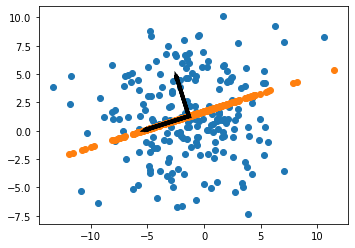

In [107]:
# a) Plot X
pt.figure()
pt.scatter(X[:,0],X[:,1])
# b) Plot this on top
pt.gca().set_aspect("equal")
for i in range(len(principal_components)):
    pt.arrow(mean[0], mean[1],
            principal_components[i, 0], principal_components[i, 1],
            linewidth=4, zorder=10)
# c) Y
print((la.norm(Y-U@np.diag(s)@Vt,2))/la.norm(Y,2))
# d) Compute X_prime and plot as before
sn=s.copy()
sn[-1]=0
Yp=U@np.diag(sn)@Vt
X_prime=Yp*(N-1)**0.5+mean
principal_components_n=np.diag(sn)@Vt

pt.scatter(X_prime[:,0],X_prime[:,1])
# b) Plot this on top
for i in range(len(principal_components)):
    pt.arrow(mean[0], mean[1],
            principal_components_n[i, 0], principal_components_n[i, 1],
            linewidth=4, zorder=10)
pt.show()